## Análise e diagnóstico

Nesse notebook são feitas algumas análises para o diagnóstico dos dados da API do Olho Vivo

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import random
from utils.load_csv import load_csv

In [2]:
consumo_diesel = load_csv('consumo_diesel.csv')

df_posicoes = load_csv('df_posicoes.csv')

df_final = load_csv('df_final.csv')

Ônibus que operam em mais de uma linha

In [3]:
df_posicoes

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo
0,342M-10,41610,2025-09-03T11:27:39Z,-23.519454,-46.546797,False,Articulado (23m)
1,342M-10,41501,2025-09-03T11:27:27Z,-23.599379,-46.485247,True,Miniônibus
2,342M-10,41783,2025-09-03T11:27:57Z,-23.564488,-46.513625,True,Articulado (18m)
3,342M-10,41510,2025-09-03T11:27:27Z,-23.613857,-46.476304,True,Miniônibus
4,342M-10,41583,2025-09-03T11:27:38Z,-23.613857,-46.476304,True,Midiônibus
...,...,...,...,...,...,...,...
147587,8009-10,10423,2025-09-03T11:34:57Z,-23.463490,-46.746013,False,Articulado (23m)
147588,6L02-10,66258,2025-09-03T11:34:51Z,-23.910759,-46.766351,False,Padron
147589,8021-10,80113,2025-09-03T11:35:01Z,-23.577175,-46.765109,True,Miniônibus
147590,6815-10,72011,2025-09-03T11:34:35Z,-23.656454,-46.763021,False,Articulado (18m)


In [4]:
df_posicoes['id_2'] = df_posicoes['linha'] + '_' + df_posicoes['id_onibus'].astype(str)

df_posicoes.head()

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo,id_2
0,342M-10,41610,2025-09-03T11:27:39Z,-23.519454,-46.546797,False,Articulado (23m),342M-10_41610
1,342M-10,41501,2025-09-03T11:27:27Z,-23.599379,-46.485247,True,Miniônibus,342M-10_41501
2,342M-10,41783,2025-09-03T11:27:57Z,-23.564488,-46.513625,True,Articulado (18m),342M-10_41783
3,342M-10,41510,2025-09-03T11:27:27Z,-23.613857,-46.476304,True,Miniônibus,342M-10_41510
4,342M-10,41583,2025-09-03T11:27:38Z,-23.613857,-46.476304,True,Midiônibus,342M-10_41583


In [5]:
df_posicoes['id_onibus'].nunique()

11524

In [6]:
df_posicoes['id_2'].nunique()

11544

In [7]:
df = df_posicoes.groupby('id_onibus')['linha'].nunique() > 1

ids_multilinhas = df_posicoes[df_posicoes['id_onibus'].isin(df[df].index)]

ids_multilinhas[['id_onibus', 'linha']].drop_duplicates().sort_values('id_onibus')

,id_onibus,linha
3020,7311,675K-10
80379,7311,675K-23
69005,7311,677A-10
11197,10418,8047-51
84319,10418,8047-10
8190,12683,917M-31
126142,12683,917M-10
41049,22116,1788-10
518,22116,1788-31
5199,31128,4310-21


In [8]:
counts = df_posicoes.groupby('id_onibus')['linha'].nunique()

ids_multilinhas = counts[counts > 1].index

ids_multilinhas

Index([ 7311, 10418, 12683, 22116, 31128, 36195, 36263, 36520, 41559, 47571,
       51449, 55093, 61221, 61668, 66943, 73837, 85763, 90999],
      dtype='int64', name='id_onibus')

Horas e datas das posições

In [9]:
df_posicoes["timestamp"] = pd.to_datetime(df_posicoes["timestamp"])

In [10]:
df_posicoes['timestamp'] = df_posicoes['timestamp'].dt.tz_convert("America/Sao_Paulo")

df_posicoes

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo,id_2
0,342M-10,41610,2025-09-03 08:27:39-03:00,-23.519454,-46.546797,False,Articulado (23m),342M-10_41610
1,342M-10,41501,2025-09-03 08:27:27-03:00,-23.599379,-46.485247,True,Miniônibus,342M-10_41501
2,342M-10,41783,2025-09-03 08:27:57-03:00,-23.564488,-46.513625,True,Articulado (18m),342M-10_41783
3,342M-10,41510,2025-09-03 08:27:27-03:00,-23.613857,-46.476304,True,Miniônibus,342M-10_41510
4,342M-10,41583,2025-09-03 08:27:38-03:00,-23.613857,-46.476304,True,Midiônibus,342M-10_41583
...,...,...,...,...,...,...,...,...
147587,8009-10,10423,2025-09-03 08:34:57-03:00,-23.463490,-46.746013,False,Articulado (23m),8009-10_10423
147588,6L02-10,66258,2025-09-03 08:34:51-03:00,-23.910759,-46.766351,False,Padron,6L02-10_66258
147589,8021-10,80113,2025-09-03 08:35:01-03:00,-23.577175,-46.765109,True,Miniônibus,8021-10_80113
147590,6815-10,72011,2025-09-03 08:34:35-03:00,-23.656454,-46.763021,False,Articulado (18m),6815-10_72011


In [11]:
horas = df_posicoes["timestamp"].dt.hour

horas_unicas = horas.unique()
horas_unicas.sort()

print(horas_unicas)

[ 0  1  7  8 11 13]


In [12]:
onze_horas = df_posicoes[df_posicoes["timestamp"].dt.hour == 11]

onze_horas

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo,id_2
700,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,True,Articulado (18m),1721-10_22538
12056,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Biarticulado,1721-10_22538
23095,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,True,Articulado (18m),1721-10_22538
34457,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Básico,1721-10_22538
46599,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Básico,1721-10_22538
57967,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Padron,1721-10_22538
68520,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Midiônibus,1721-10_22538
79894,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,True,Articulado (23m),1721-10_22538
91570,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Padron,1721-10_22538
103399,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Articulado (18m),1721-10_22538


In [13]:
datas = df_posicoes["timestamp"].dt.date

datas_unicas = datas.unique()
datas_unicas.sort()

print(datas_unicas)

[datetime.date(2025, 9, 2) datetime.date(2025, 9, 3)]


Recalculando distâncias percorridas

In [14]:
gdf = gpd.GeoDataFrame(df_posicoes, geometry=gpd.points_from_xy(df_posicoes.lon, df_posicoes.lat), crs="EPSG:4326")

gdf = gdf.to_crs("EPSG:31983")

gdf

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo,id_2,geometry
0,342M-10,41610,2025-09-03 08:27:39-03:00,-23.519454,-46.546797,False,Articulado (23m),342M-10_41610,POINT (342081.78 7398124.086)
1,342M-10,41501,2025-09-03 08:27:27-03:00,-23.599379,-46.485247,True,Miniônibus,342M-10_41501,POINT (348458.391 7389340.232)
2,342M-10,41783,2025-09-03 08:27:57-03:00,-23.564488,-46.513625,True,Articulado (18m),342M-10_41783,POINT (345521.61 7393173.434)
3,342M-10,41510,2025-09-03 08:27:27-03:00,-23.613857,-46.476304,True,Miniônibus,342M-10_41510,POINT (349387.504 7387746.422)
4,342M-10,41583,2025-09-03 08:27:38-03:00,-23.613857,-46.476304,True,Midiônibus,342M-10_41583,POINT (349387.504 7387746.422)
...,...,...,...,...,...,...,...,...,...
147587,8009-10,10423,2025-09-03 08:34:57-03:00,-23.463490,-46.746013,False,Articulado (23m),8009-10_10423,POINT (321663.753 7404088.311)
147588,6L02-10,66258,2025-09-03 08:34:51-03:00,-23.910759,-46.766351,False,Padron,6L02-10_66258,POINT (320199.614 7354530.058)
147589,8021-10,80113,2025-09-03 08:35:01-03:00,-23.577175,-46.765109,True,Miniônibus,8021-10_80113,POINT (319867.674 7391474.757)
147590,6815-10,72011,2025-09-03 08:34:35-03:00,-23.656454,-46.763021,False,Articulado (18m),6815-10_72011,POINT (320189.055 7382697.715)


In [15]:
gdf["x"] = gdf.geometry.x
gdf["y"] = gdf.geometry.y

gdf.head()

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo,id_2,geometry,x,y
0,342M-10,41610,2025-09-03 08:27:39-03:00,-23.519454,-46.546797,False,Articulado (23m),342M-10_41610,POINT (342081.78 7398124.086),342081.780020,7.398124e+06
1,342M-10,41501,2025-09-03 08:27:27-03:00,-23.599379,-46.485247,True,Miniônibus,342M-10_41501,POINT (348458.391 7389340.232),348458.391007,7.389340e+06
2,342M-10,41783,2025-09-03 08:27:57-03:00,-23.564488,-46.513625,True,Articulado (18m),342M-10_41783,POINT (345521.61 7393173.434),345521.610344,7.393173e+06
3,342M-10,41510,2025-09-03 08:27:27-03:00,-23.613857,-46.476304,True,Miniônibus,342M-10_41510,POINT (349387.504 7387746.422),349387.503545,7.387746e+06
4,342M-10,41583,2025-09-03 08:27:38-03:00,-23.613857,-46.476304,True,Midiônibus,342M-10_41583,POINT (349387.504 7387746.422),349387.503545,7.387746e+06


In [16]:
consumo_diesel['emissa_no2_l_diesel'] = [random.uniform(0.02, 0.05) for _ in range(len(consumo_diesel))]

consumo_diesel['emissa_co2_l_diesel'] = [random.uniform(0.05, 0.1) for _ in range(len(consumo_diesel))]

def get_tipo_onibus(id_onibus):

    onibus = df_posicoes[df_posicoes['id_onibus']==id_onibus]

    return onibus['modelo'].unique()[0]

def get_fator_consumo(tipo_veiculo):

    cosumo_modelo = consumo_diesel[consumo_diesel['tecnologia']==tipo_veiculo]

    return cosumo_modelo['com_ar_l_km'].unique()[0]

def get_consumo_co2(tipo_veiculo, km_rodados):

    consumo_l = get_fator_consumo(tipo_veiculo)
    consumo_fato = consumo_l * km_rodados

    fator_emissao_modelo = consumo_diesel[consumo_diesel['tecnologia']==tipo_veiculo]
    fator_emissao_co2_modelo = fator_emissao_modelo['emissa_co2_l_diesel'].unique()[0]
    emissao_co2 = fator_emissao_co2_modelo * consumo_fato

    return emissao_co2

def get_consumo_no2(tipo_veiculo, km_rodados):

    consumo_l = get_fator_consumo(tipo_veiculo)
    consumo_fato = consumo_l * km_rodados

    fator_emissao_modelo = consumo_diesel[consumo_diesel['tecnologia']==tipo_veiculo]
    fator_emissao_no2_modelo = fator_emissao_modelo['emissa_no2_l_diesel'].unique()[0]
    emissao_no2 = fator_emissao_no2_modelo * consumo_fato

    return emissao_no2

In [17]:
data_frame = []

#for id_onibus in gdf['id_onibus'].unique():
    #df_onibus = gdf[gdf['id_onibus'] == id_onibus].reset_index(drop=True)
    #df_onibus.sort_values(by='timestamp', inplace=True)

for id_onibus in gdf['id_onibus'].unique():
    df_onibus = (gdf[gdf['id_onibus'] == id_onibus].sort_values(by='timestamp').reset_index(drop=True))

    for i, row in df_onibus.iterrows():
 
        if i < len(df_onibus)-1:
            x_atual = row['x']
            x_depois = df_onibus.loc[i+1, 'x']
            y_atual = row['y']
            y_depois = df_onibus.loc[i+1, 'y']
            momento_inicial = row['timestamp']
            momento_final = df_onibus.loc[i+1, 'timestamp']
            tipo_veiculo = get_tipo_onibus(row['id_onibus'])
            litro_diesel = get_fator_consumo(tipo_veiculo)
            
            dist = np.sqrt((x_depois - x_atual)**2 + (y_depois - y_atual)**2)
            
            dados = {
                'id_onibus' : row['id_onibus'],
                'linha' : row['linha'],
                'is_eletrico' : row['is_eletrico'],
                'distancia_percorrida' : dist,
                'ponto_inicial' : [x_atual, y_atual],
                'ponto_final' : [x_depois, y_depois],
                'momento_inicial' : momento_inicial,
                'momento_final' : momento_final,
                'modelo' : tipo_veiculo,
                'litro_diesel_km' : litro_diesel,
                'emissao_no2' : get_consumo_no2(tipo_veiculo, dist),
                'emissao_co2' : get_consumo_co2(tipo_veiculo, dist)
            }

            data_frame.append(dados)

gdf_final = pd.DataFrame(data_frame)
gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2
0,41610,342M-10,False,112.318604,"[342081.78002049256, 7398124.085733271]","[341969.5112152252, 7398127.429994314]",2025-09-03 08:27:39-03:00,2025-09-03 08:28:24-03:00,Articulado (23m),0.85,2.053071,5.838309
1,41610,342M-10,True,0.000000,"[341969.5112152252, 7398127.429994314]","[341969.5112152252, 7398127.429994314]",2025-09-03 08:28:24-03:00,2025-09-03 08:28:24-03:00,Articulado (23m),0.85,0.000000,0.000000
2,41610,342M-10,True,350.830430,"[341969.5112152252, 7398127.429994314]","[341740.3574120132, 7397861.778859812]",2025-09-03 08:28:24-03:00,2025-09-03 08:29:54-03:00,Articulado (23m),0.85,6.412826,18.236129
3,41610,342M-10,False,199.222435,"[341740.3574120132, 7397861.778859812]","[341610.7160945124, 7397710.508547873]",2025-09-03 08:29:54-03:00,2025-09-03 08:30:38-03:00,Articulado (23m),0.85,3.641585,10.355561
4,41610,342M-10,True,209.129131,"[341610.7160945124, 7397710.508547873]","[341474.75205618294, 7397551.609921319]",2025-09-03 08:30:38-03:00,2025-09-03 08:31:23-03:00,Articulado (23m),0.85,3.822669,10.870510


In [18]:
df_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2
0,41610,342M-10,False,0.001100,"[-46.546797, -23.5194545]","[np.float64(-46.547896), np.float64(-23.519413...",2025-09-03 11:27:39+00:00,2025-09-03 11:28:24+00:00,Articulado (23m),0.85,0.000042,0.000086
1,41610,342M-10,True,0.000000,"[-46.547896, -23.519413375]","[np.float64(-46.547896), np.float64(-23.519413...",2025-09-03 11:28:24+00:00,2025-09-03 11:28:24+00:00,Articulado (23m),0.85,0.000000,0.000000
2,41610,342M-10,True,0.003288,"[-46.547896, -23.519413375]","[np.float64(-46.550168), np.float64(-23.521789...",2025-09-03 11:28:24+00:00,2025-09-03 11:29:54+00:00,Articulado (23m),0.85,0.000126,0.000258
3,41610,342M-10,False,0.001866,"[-46.550168, -23.52178975]","[np.float64(-46.5514535), np.float64(-23.523143)]",2025-09-03 11:29:54+00:00,2025-09-03 11:30:38+00:00,Articulado (23m),0.85,0.000071,0.000147
4,41610,342M-10,True,0.001959,"[-46.5514535, -23.523143]","[np.float64(-46.55280175), np.float64(-23.5245...",2025-09-03 11:30:38+00:00,2025-09-03 11:31:23+00:00,Articulado (23m),0.85,0.000075,0.000154


In [19]:
gdf_final['id_onibus'].nunique()

11504

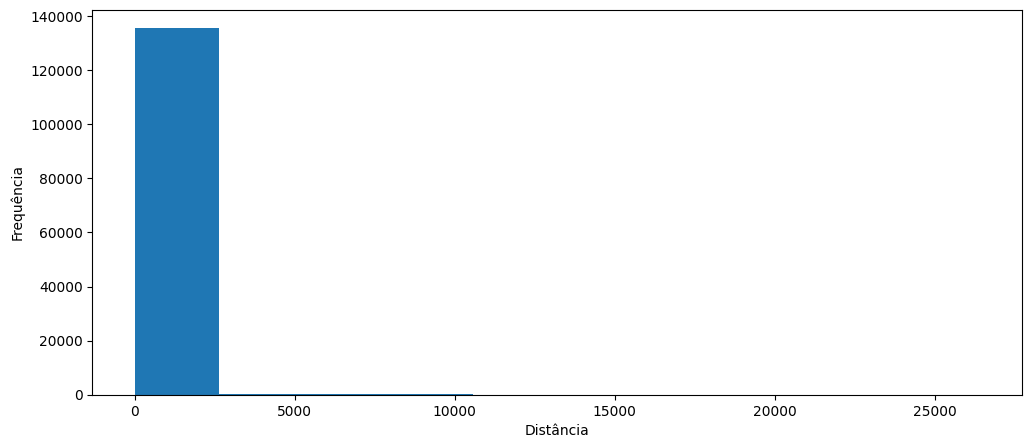

In [20]:
plt.figure(figsize=(12,5))
plt.hist(gdf_final["distancia_percorrida"])
plt.xlabel("Distância")
plt.ylabel("Frequência")
plt.show()

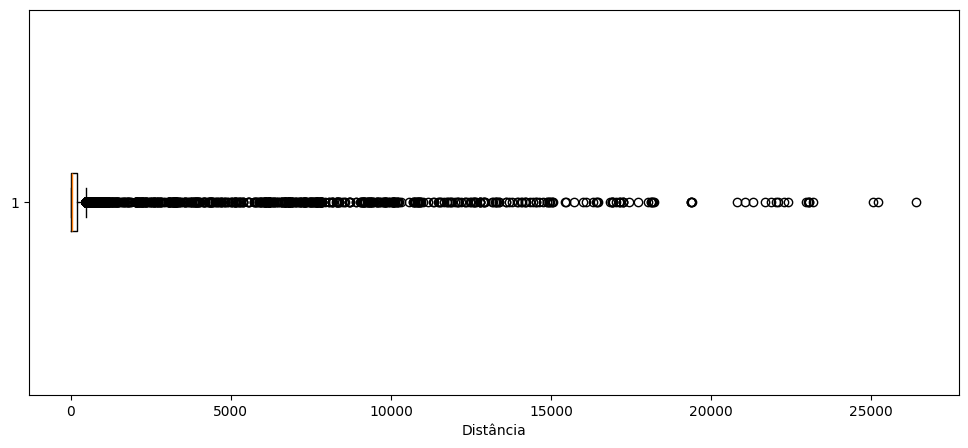

In [21]:
plt.figure(figsize=(12,5))
plt.boxplot(gdf_final["distancia_percorrida"], vert=False)
plt.xlabel("Distância")
plt.show()

In [22]:
gdf_final[gdf_final['distancia_percorrida'] >= 25000]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2
21989,31841,3459-10,False,25074.054972,"[333746.05902389076, 7394866.148214988]","[358537.9671505152, 7398617.084653763]",2025-09-03 08:31:56-03:00,2025-09-03 08:32:47-03:00,Biarticulado,0.90,848.678528,2221.330819
38922,61587,5370-10,False,25225.010680,"[325117.0786599126, 7370478.8199460115]","[332865.93880648626, 7394484.159565672]",2025-09-03 08:28:45-03:00,2025-09-03 08:29:37-03:00,Miniônibus,0.35,233.576763,690.465245
114812,32503,2678-10,False,26412.841301,"[333800.73546429066, 7394668.411742855]","[359422.7636728245, 7401083.2270999625]",2025-09-03 08:31:04-03:00,2025-09-03 08:31:48-03:00,Articulado (23m),0.85,482.800049,1372.936736


Velocidades impossíveis

In [23]:
gdf_final['momento_final'].dtype

datetime64[ns, America/Sao_Paulo]

In [24]:
gdf_final['momento_inicial'] = pd.to_datetime(gdf_final['momento_inicial'])
gdf_final['momento_final']   = pd.to_datetime(gdf_final['momento_final'])

gdf_final['momento_final'].dtype

datetime64[ns, America/Sao_Paulo]

In [25]:
gdf_final['duracao'] = (gdf_final['momento_final'] - gdf_final['momento_inicial']).dt.total_seconds()

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao
0,41610,342M-10,False,112.318604,"[342081.78002049256, 7398124.085733271]","[341969.5112152252, 7398127.429994314]",2025-09-03 08:27:39-03:00,2025-09-03 08:28:24-03:00,Articulado (23m),0.85,2.053071,5.838309,45.0
1,41610,342M-10,True,0.000000,"[341969.5112152252, 7398127.429994314]","[341969.5112152252, 7398127.429994314]",2025-09-03 08:28:24-03:00,2025-09-03 08:28:24-03:00,Articulado (23m),0.85,0.000000,0.000000,0.0
2,41610,342M-10,True,350.830430,"[341969.5112152252, 7398127.429994314]","[341740.3574120132, 7397861.778859812]",2025-09-03 08:28:24-03:00,2025-09-03 08:29:54-03:00,Articulado (23m),0.85,6.412826,18.236129,90.0
3,41610,342M-10,False,199.222435,"[341740.3574120132, 7397861.778859812]","[341610.7160945124, 7397710.508547873]",2025-09-03 08:29:54-03:00,2025-09-03 08:30:38-03:00,Articulado (23m),0.85,3.641585,10.355561,44.0
4,41610,342M-10,True,209.129131,"[341610.7160945124, 7397710.508547873]","[341474.75205618294, 7397551.609921319]",2025-09-03 08:30:38-03:00,2025-09-03 08:31:23-03:00,Articulado (23m),0.85,3.822669,10.870510,45.0


In [26]:
gdf_final["velocidade"] = (gdf_final["distancia_percorrida"] / gdf_final["duracao"]) * 3.6

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao,velocidade
0,41610,342M-10,False,112.318604,"[342081.78002049256, 7398124.085733271]","[341969.5112152252, 7398127.429994314]",2025-09-03 08:27:39-03:00,2025-09-03 08:28:24-03:00,Articulado (23m),0.85,2.053071,5.838309,45.0,8.985488
1,41610,342M-10,True,0.000000,"[341969.5112152252, 7398127.429994314]","[341969.5112152252, 7398127.429994314]",2025-09-03 08:28:24-03:00,2025-09-03 08:28:24-03:00,Articulado (23m),0.85,0.000000,0.000000,0.0,NaN
2,41610,342M-10,True,350.830430,"[341969.5112152252, 7398127.429994314]","[341740.3574120132, 7397861.778859812]",2025-09-03 08:28:24-03:00,2025-09-03 08:29:54-03:00,Articulado (23m),0.85,6.412826,18.236129,90.0,14.033217
3,41610,342M-10,False,199.222435,"[341740.3574120132, 7397861.778859812]","[341610.7160945124, 7397710.508547873]",2025-09-03 08:29:54-03:00,2025-09-03 08:30:38-03:00,Articulado (23m),0.85,3.641585,10.355561,44.0,16.300017
4,41610,342M-10,True,209.129131,"[341610.7160945124, 7397710.508547873]","[341474.75205618294, 7397551.609921319]",2025-09-03 08:30:38-03:00,2025-09-03 08:31:23-03:00,Articulado (23m),0.85,3.822669,10.870510,45.0,16.730330


In [27]:
gdf_final['velocidade'].describe()

c:\Users\x050258\projetos\dash_onibus_eletricos\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.034250e+05
mean              inf
std               NaN
min      0.000000e+00
25%      9.022210e-01
50%      9.327377e+00
75%      1.785525e+01
max               inf
Name: velocidade, dtype: float64

In [33]:
gdf_final = gdf_final.replace([np.inf, -np.inf], np.nan)

gdf_final = gdf_final.dropna(subset=['velocidade'])

In [34]:
gdf_final['velocidade'].describe()

count    103423.000000
mean         15.018552
std          73.318308
min           0.000000
25%           0.902221
50%           9.327068
75%          17.854773
max        8719.623379
Name: velocidade, dtype: float64

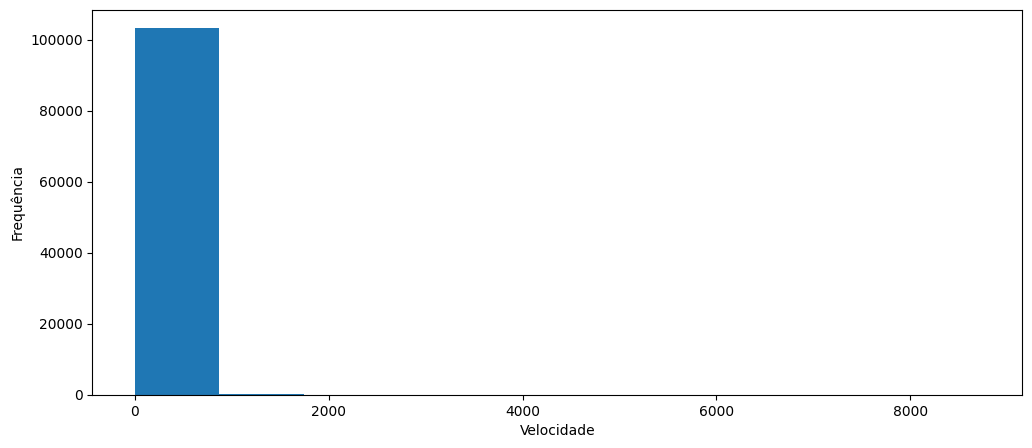

In [38]:
plt.figure(figsize=(12,5))
plt.hist(gdf_final["velocidade"])
plt.xlabel("Velocidade")
plt.ylabel("Frequência")
plt.show()

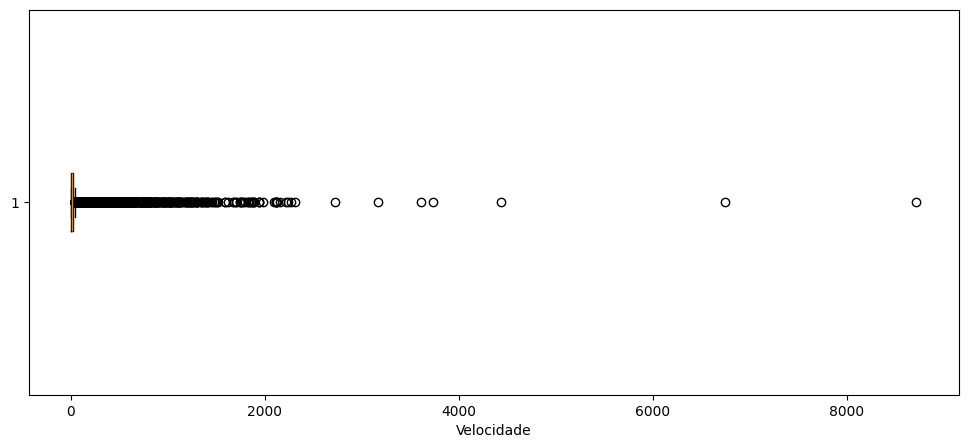

In [36]:
plt.figure(figsize=(12,5))
plt.boxplot(gdf_final["velocidade"], vert=False)
plt.xlabel("Velocidade")
plt.show()

In [28]:
gdf_final[(gdf_final['velocidade'] >= 0) & (gdf_final['velocidade'] <= 50)]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao,velocidade
0,41610,342M-10,False,112.318604,"[342081.78002049256, 7398124.085733271]","[341969.5112152252, 7398127.429994314]",2025-09-03 08:27:39-03:00,2025-09-03 08:28:24-03:00,Articulado (23m),0.85,2.053071,5.838309,45.0,8.985488
2,41610,342M-10,True,350.830430,"[341969.5112152252, 7398127.429994314]","[341740.3574120132, 7397861.778859812]",2025-09-03 08:28:24-03:00,2025-09-03 08:29:54-03:00,Articulado (23m),0.85,6.412826,18.236129,90.0,14.033217
3,41610,342M-10,False,199.222435,"[341740.3574120132, 7397861.778859812]","[341610.7160945124, 7397710.508547873]",2025-09-03 08:29:54-03:00,2025-09-03 08:30:38-03:00,Articulado (23m),0.85,3.641585,10.355561,44.0,16.300017
4,41610,342M-10,True,209.129131,"[341610.7160945124, 7397710.508547873]","[341474.75205618294, 7397551.609921319]",2025-09-03 08:30:38-03:00,2025-09-03 08:31:23-03:00,Articulado (23m),0.85,3.822669,10.870510,45.0,16.730330
6,41610,342M-10,True,103.787302,"[341474.75205618294, 7397551.609921319]","[341450.1347490767, 7397450.784368243]",2025-09-03 08:31:23-03:00,2025-09-03 08:32:08-03:00,Articulado (23m),0.85,1.897127,5.394853,45.0,8.302984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136061,13639,9014-10,False,0.000000,"[326467.6864551779, 7397860.951749464]","[326467.6864551779, 7397860.951749464]",2025-09-03 08:34:02-03:00,2025-09-03 08:34:27-03:00,Miniônibus,0.35,0.000000,0.000000,25.0,0.000000
136062,13639,9014-10,True,0.000000,"[326467.6864551779, 7397860.951749464]","[326467.6864551779, 7397860.951749464]",2025-09-03 08:34:27-03:00,2025-09-03 08:34:47-03:00,Miniônibus,0.35,0.000000,0.000000,20.0,0.000000
136064,77879,6049-10,False,0.000000,"[320068.8812658792, 7382609.836585452]","[320068.8812658792, 7382609.836585452]",2025-09-03 08:34:18-03:00,2025-09-03 08:35:03-03:00,Articulado (18m),0.80,0.000000,0.000000,45.0,0.000000
136065,31643,274P-10,True,79.442467,"[334093.9212274977, 7394299.5003555715]","[334040.2683614021, 7394240.9130234085]",2025-09-03 08:34:08-03:00,2025-09-03 08:34:53-03:00,Articulado (18m),0.80,2.264506,6.003471,45.0,6.355397


In [29]:
gdf_final[gdf_final['velocidade'] > 50]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao,velocidade
48,41583,342M-10,True,12766.662806,"[349387.50354469114, 7387746.422155516]","[342071.82555585005, 7398209.143348921]",2025-09-03 08:27:38-03:00,2025-09-03 08:28:30-03:00,Midiônibus,0.47,136.950961,305.959852,52.0,883.845887
98,41815,342M-10,False,12766.662806,"[342071.82555585005, 7398209.143348921]","[349387.50354469114, 7387746.422155516]",2025-09-03 08:28:35-03:00,2025-09-03 08:29:20-03:00,Miniônibus,0.35,118.215838,349.452259,45.0,1021.333024
105,41815,342M-10,True,12766.662806,"[349387.50354469114, 7387746.422155516]","[342071.82555585005, 7398209.143348921]",2025-09-03 08:33:05-03:00,2025-09-03 08:33:50-03:00,Miniônibus,0.35,118.215838,349.452259,45.0,1021.333024
280,16012,9191-10,False,9188.408306,"[333415.14199033706, 7397208.287510074]","[328564.67902236397, 7405012.123502918]",2025-09-03 08:30:41-03:00,2025-09-03 08:31:26-03:00,Biarticulado,0.90,310.998953,814.008527,45.0,735.072665
333,16372,9191-10,False,9160.841764,"[333288.33738785924, 7397163.0424438175]","[328564.67902236397, 7405012.123502918]",2025-09-03 08:28:36-03:00,2025-09-03 08:29:20-03:00,Midiônibus,0.47,98.270480,219.544436,44.0,749.523417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135993,32053,2765-10,True,9788.776238,"[339036.9549540298, 7395834.884184625]","[347261.97112645453, 7401142.355258925]",2025-09-03 08:32:00-03:00,2025-09-03 08:32:45-03:00,Biarticulado,0.90,331.319534,867.195608,45.0,783.102099
136015,32018,805L-10,False,4384.908831,"[333125.8381888706, 7391735.523750455]","[332183.3600302363, 7396017.948341782]",2025-09-03 08:32:50-03:00,2025-09-03 08:33:34-03:00,Biarticulado,0.90,148.415483,388.462621,44.0,358.765268
136026,72014,6804-10,True,1659.803675,"[323118.3063822094, 7384129.283980075]","[321535.9105864066, 7384630.254821043]",2025-09-03 08:32:54-03:00,2025-09-03 08:33:39-03:00,Miniônibus,0.35,15.369332,45.432558,45.0,132.784294
136056,71746,5111-10,False,13956.203554,"[333642.65488864016, 7394863.699479774]","[325719.849591805, 7383374.366432779]",2025-09-03 08:34:21-03:00,2025-09-03 08:35:06-03:00,Articulado (18m),0.80,397.821331,1054.670972,45.0,1116.496284


In [30]:
gdf_final[gdf_final['velocidade'] < 0]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao,velocidade
